In [17]:
import xarray as xr
import zarr
import poligrain as plg

## Open CML and RADKLIM-YW data

In [4]:
%%time
fn_zarr = 'nl_cml_2011_2015.zarr.zip'
store = zarr.storage.ZipStore(fn_zarr, mode='r')
dt_from_zarr = xr.open_datatree(store, engine='zarr')
dt_from_zarr

CPU times: user 43.6 s, sys: 6.15 s, total: 49.8 s
Wall time: 1min 4s


<xarray.DataTree>
Group: /
├── Group: /5461
│       Dimensions:              (time: 135900, cml_id: 1)
│       Coordinates:
│           site_0_lat           (cml_id) float64 8B ...
│           length               (cml_id) float64 8B ...
│           site_0_lon           (cml_id) float64 8B ...
│           site_1_lat           (cml_id) float64 8B ...
│           site_1_lon           (cml_id) float64 8B ...
│         * cml_id               (cml_id) int64 8B 5461
│           cml_id_str           <U4 16B ...
│         * time                 (time) datetime64[ns] 1MB 2011-01-12T23:15:00 ... 20...
│           frequency            (cml_id) float64 8B ...
│       Data variables:
│           sever_error_seconds  (time) uint16 272kB ...
│           pmin                 (time) float32 544kB ...
│           pmax                 (time) float32 544kB ...
│           error_seconds        (time) uint16 272kB ...
├── Group: /4636
│       Dimensions:              (time: 5320, cml_id: 1)
│       Coordinates:
│           site_0_lat           (cml_id) float64 8B ...
│           length               (cml_id) float64 8B ...
│           site_0_lon           (cml_id) float64 8B ...
│           site_1_lat           (cml_id) float64 8B ...
│           site_1_lon           (cml_id) float64 8B ...
│         * cml_id               (cml_id) int64 8B 4636
│           cml_id_str           <U4 16B ...
│         * time                 (time) datetime64[ns] 43kB 2011-01-12T23:15:00 ... 2...
│           frequency            (cml_id) float64 8B ...
│       Data variables:
│           sever_error_seconds  (time) uint16 11kB ...
│           pmin                 (time) float32 21kB ...
│           pmax                 (time) float32 21kB ...
│           error_seconds        (time) uint16 11kB ...
├── Group: /5295
│       Dimensions:              (time: 110062, cml_id: 1)
│       Coordinates:
│           site_0_lat           (cml_id) float64 8B ...
│           length               (cml_id) float64 8B ...
│           site_0_lon           (cml_id) float64 8B ...
│           site_1_lat           (cml_id) float64 8B ...
│           site_1_lon           (cml_id) float64 8B ...
│         * cml_id               (cml_id) int64 8B 5295
│           cml_id_str           <U4 16B ...
│         * time                 (time) datetime64[ns] 880kB 2011-01-12T23:15:00 ... ...
│           frequency            (cml_id) float64 8B ...
│       Data variables:
│           sever_error_seconds  (time) uint16 220kB ...
│           pmin                 (time) float32 440kB ...
│           pmax                 (time) float32 440kB ...
│           error_seconds        (time) uint16 220kB ...
...
├── Group: /1256
│       Dimensions:              (time: 62275, cml_id: 1)
│       Coordinates:
│           site_0_lat           (cml_id) float64 8B ...
│           length               (cml_id) float64 8B ...
│           site_0_lon           (cml_id) float64 8B ...
│           site_1_lat           (cml_id) float64 8B ...
│           site_1_lon           (cml_id) float64 8B ...
│         * cml_id               (cml_id) int64 8B 1256
│           cml_id_str           <U4 16B ...
│         * time                 (time) datetime64[ns] 498kB 2011-01-13 ... 2013-11-1...
│           frequency            (cml_id) float64 8B ...
│       Data variables:
│           sever_error_seconds  (time) uint16 125kB ...
│           pmin                 (time) float32 249kB ...
│           pmax                 (time) float32 249kB ...
│           error_seconds        (time) uint16 125kB ...
├── Group: /0088
│       Dimensions:              (time: 72944, cml_id: 1)
│       Coordinates:
│           site_0_lat           (cml_id) float64 8B ...
│           length               (cml_id) float64 8B ...
│           site_0_lon           (cml_id) float64 8B ...
│           site_1_lat           (cml_id) float64 8B ...
│           site_1_lon           (cml_id) float64 8B ...
│         * cml_id               (cml_id) int64 8B 88
│        

In [69]:
ds_radklim = xr.open_mfdataset(
    '/pd/data/regclim_data/gridded_data/precipitation/RADKLIM/RADKLIM_RW_V2017.002/RADKLIM_YW2017.002_201[12345].nc',
    chunks={'time': 10},
)
ds_radklim

/tmp/ipykernel_3316081/2293629497.py:1: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 10. This could degrade performance. Instead, consider rechunking after loading.
  ds_radklim = xr.open_mfdataset(
/tmp/ipykernel_3316081/2293629497.py:1: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 10. This could degrade performance. Instead, consider rechunking after loading.
  ds_radklim = xr.open_mfdataset(
/tmp/ipykernel_3316081/2293629497.py:1: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 10. This could degrade performance. Instead, consider rechunking after loading.
  ds_radklim = xr.open_mfdataset(
/tmp/ipykernel_3316081/2293629497.py:1: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 10. This could degrade performance. Instead, consider rechunking after loading.
  ds_radkl

<xarray.Dataset> Size: 10TB
Dimensions:          (time: 525888, y: 1100, x: 900)
Coordinates:
  * x                (x) float64 7kB -443.5 -442.5 -441.5 ... 453.5 454.5 455.5
  * y                (y) float64 9kB -4.759e+03 -4.758e+03 ... -3.66e+03
    latitudes        (y, x) float64 8MB dask.array<chunksize=(1100, 900), meta=np.ndarray>
    longitudes       (y, x) float64 8MB dask.array<chunksize=(1100, 900), meta=np.ndarray>
  * time             (time) datetime64[ns] 4MB 2011-01-01 ... 2015-12-31T23:5...
Data variables:
    rainfall_amount  (time, y, x) float64 4TB dask.array<chunksize=(10, 1100, 900), meta=np.ndarray>
    maxrange         (time) int16 1MB dask.array<chunksize=(10,), meta=np.ndarray>
    radarlocations   (time) <U67 141MB dask.array<chunksize=(10,), meta=np.ndarray>
    secondary        (time, y, x) float32 2TB dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
    nodatamask       (time, y, x) float32 2TB dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
    cluttermask      (time, y, x) float32 2TB dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
    radolan_grid     (time) float64 4MB 9.969e+36 9.969e+36 ... 9.969e+36
Attributes:
    title:        RADOLAN YW rainfall data
    producttype:  YW
    institution:  Deutscher Wetterdienst (DWD)
    history:      Created at 2020-02-26 02:30:15.253548
    Conventions:  CF-1.6

## Create xr.Dataset with correct CML metadata

In [10]:
import tqdm
tqdm.tqdm_notebook()

/tmp/ipykernel_3316081/224970837.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm.tqdm_notebook()


0it [00:00, ?it/s]

In [13]:
ds_cmls_metadata_list = []
for cml_id in tqdm.notebook.tqdm(dt_from_zarr.groups[1:]):
    ds_temp = xr.Dataset(coords=dt_from_zarr[cml_id].coords)
    ds_temp = ds_temp.drop_vars('time')
    ds_cmls_metadata_list.append(ds_temp)

  0%|          | 0/5891 [00:00<?, ?it/s]

In [15]:
%%time
ds_cmls_metadata = xr.concat(ds_cmls_metadata_list, dim='cml_id')

CPU times: user 22.3 s, sys: 6.41 s, total: 28.7 s
Wall time: 27.7 s


In [16]:
ds_cmls_metadata

<xarray.Dataset> Size: 424kB
Dimensions:     (cml_id: 5891)
Coordinates:
    site_0_lat  (cml_id) float64 47kB 52.74 52.23 53.13 ... 52.25 52.98 52.27
    length      (cml_id) float64 47kB 6.769 4.955 4.294 ... 1.581 2.166 7.755
    site_0_lon  (cml_id) float64 47kB 5.234 6.627 6.586 ... 6.169 5.892 4.57
    site_1_lat  (cml_id) float64 47kB 52.7 52.25 53.17 ... 52.26 52.97 52.33
    site_1_lon  (cml_id) float64 47kB 5.163 6.692 6.596 ... 6.152 5.918 4.632
  * cml_id      (cml_id) int64 47kB 5461 4636 5295 1836 316 ... 233 1256 88 3845
    cml_id_str  (cml_id) <U4 94kB '5461' '4636' '5295' ... '1256' '0088' '3845'
    frequency   (cml_id) float64 47kB 25.41 37.99 39.24 ... 37.95 37.91 27.0
Data variables:
    *empty*

## Get RADKLIM-YW along CMLs

In [70]:
ds_radklim = ds_radklim.rename({'latitudes': 'lat', 'longitudes': 'lon'})

In [71]:
ds_radklim['lat'] = ds_radklim.lat.load()
ds_radklim['lon'] = ds_radklim.lon.load()

In [72]:
ds_radklim

<xarray.Dataset> Size: 10TB
Dimensions:          (time: 525888, y: 1100, x: 900)
Coordinates:
  * x                (x) float64 7kB -443.5 -442.5 -441.5 ... 453.5 454.5 455.5
  * y                (y) float64 9kB -4.759e+03 -4.758e+03 ... -3.66e+03
    lat              (y, x) float64 8MB 46.19 46.19 46.19 ... 55.53 55.53 55.53
    lon              (y, x) float64 8MB 4.676 4.688 4.7 ... 17.06 17.08 17.1
  * time             (time) datetime64[ns] 4MB 2011-01-01 ... 2015-12-31T23:5...
Data variables:
    rainfall_amount  (time, y, x) float64 4TB dask.array<chunksize=(10, 1100, 900), meta=np.ndarray>
    maxrange         (time) int16 1MB dask.array<chunksize=(10,), meta=np.ndarray>
    radarlocations   (time) <U67 141MB dask.array<chunksize=(10,), meta=np.ndarray>
    secondary        (time, y, x) float32 2TB dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
    nodatamask       (time, y, x) float32 2TB dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
    cluttermask      (time, y, x) float32 2TB dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
    radolan_grid     (time) float64 4MB 9.969e+36 9.969e+36 ... 9.969e+36
Attributes:
    title:        RADOLAN YW rainfall data
    producttype:  YW
    institution:  Deutscher Wetterdienst (DWD)
    history:      Created at 2020-02-26 02:30:15.253548
    Conventions:  CF-1.6

In [73]:
ds_cmls_metadata

<xarray.Dataset> Size: 424kB
Dimensions:     (cml_id: 5891)
Coordinates:
    site_0_lat  (cml_id) float64 47kB 52.74 52.23 53.13 ... 52.25 52.98 52.27
    length      (cml_id) float64 47kB 6.769 4.955 4.294 ... 1.581 2.166 7.755
    site_0_lon  (cml_id) float64 47kB 5.234 6.627 6.586 ... 6.169 5.892 4.57
    site_1_lat  (cml_id) float64 47kB 52.7 52.25 53.17 ... 52.26 52.97 52.33
    site_1_lon  (cml_id) float64 47kB 5.163 6.692 6.596 ... 6.152 5.918 4.632
  * cml_id      (cml_id) int64 47kB 5461 4636 5295 1836 316 ... 233 1256 88 3845
    cml_id_str  (cml_id) <U4 94kB '5461' '4636' '5295' ... '1256' '0088' '3845'
    frequency   (cml_id) float64 47kB 25.41 37.99 39.24 ... 37.95 37.91 27.0
Data variables:
    *empty*

### Set up GridAtLines which stores the intersection weights

This takes some time...

In [33]:
%%time

get_grid_at_lines = plg.spatial.GridAtLines(
    da_gridded_data=ds_radklim.isel(time=slice(0, 100)).rainfall_amount,
    ds_line_data=ds_cmls_metadata,
    grid_point_location='lower_left',
    use_lon_lat=True,
)

CPU times: user 4min 17s, sys: 1min 12s, total: 5min 30s
Wall time: 5min 33s


### Get radar along CML for short period because this does not work with dask arrays

In [74]:
%%time
ds_rad_along_cmls = get_grid_at_lines(da_gridded_data=ds_radklim.isel(time=slice(0, 1000)).rainfall_amount.load())

CPU times: user 10.5 s, sys: 3.68 s, total: 14.2 s
Wall time: 7.88 s


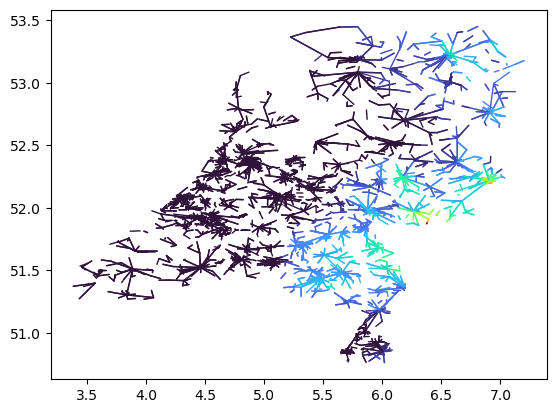

In [75]:
ds_rad_along_cmls.sum(dim='time').plg.plot_cmls()

In [85]:
import pandas as pd

t_range = pd.date_range('2011-01-13', '2015-03-15', freq='5min')
t_range

DatetimeIndex(['2011-01-13 00:00:00', '2011-01-13 00:05:00',
               '2011-01-13 00:10:00', '2011-01-13 00:15:00',
               '2011-01-13 00:20:00', '2011-01-13 00:25:00',
               '2011-01-13 00:30:00', '2011-01-13 00:35:00',
               '2011-01-13 00:40:00', '2011-01-13 00:45:00',
               ...
               '2015-03-14 23:15:00', '2015-03-14 23:20:00',
               '2015-03-14 23:25:00', '2015-03-14 23:30:00',
               '2015-03-14 23:35:00', '2015-03-14 23:40:00',
               '2015-03-14 23:45:00', '2015-03-14 23:50:00',
               '2015-03-14 23:55:00', '2015-03-15 00:00:00'],
              dtype='datetime64[ns]', length=438337, freq='5min')

In [78]:
438337 / 1000 * 7 / 60

51.139316666666666

In [93]:
for i in tqdm.notebook.tqdm(range(999, len(t_range), 1000)):
    t_start = t_range[i-999]
    t_end = t_range[i]
    print(t_start, t_end)
    if i > 3000:
        break

  0%|          | 0/438 [00:00<?, ?it/s]

2011-01-13 00:00:00 2011-01-16 11:15:00
2011-01-16 11:20:00 2011-01-19 22:35:00
2011-01-19 22:40:00 2011-01-23 09:55:00
2011-01-23 10:00:00 2011-01-26 21:15:00


In [97]:
ds_rad_along_cmls_list = []
for i in tqdm.notebook.tqdm(range(999, len(t_range), 1000)):
    t_start = t_range[i-999]
    t_end = t_range[i]
    ds_rad_along_cmls_list.append(
        get_grid_at_lines(da_gridded_data=ds_radklim.sel(time=slice(t_start, t_end)).rainfall_amount.load())
    )

  0%|          | 0/438 [00:00<?, ?it/s]

In [101]:
%%time
ds_rad_along_cmls = xr.concat(ds_rad_along_cmls_list, dim='time')

CPU times: user 1.44 s, sys: 1.88 s, total: 3.32 s
Wall time: 3.34 s


In [102]:
ds_rad_along_cmls

<xarray.DataArray (time: 437983, cml_id: 5891)> Size: 21GB
array([[       nan, 0.06778653, 0.        , ..., 0.05      , 0.        ,
               nan],
       [       nan, 0.05      , 0.        , ..., 0.0621946 , 0.        ,
               nan],
       [       nan, 0.0354621 , 0.        , ..., 0.0466058 , 0.        ,
               nan],
       ...,
       [       nan, 0.        , 0.        , ..., 0.        , 0.        ,
               nan],
       [       nan, 0.        , 0.        , ..., 0.        , 0.        ,
               nan],
       [       nan, 0.        , 0.        , ..., 0.        , 0.        ,
               nan]], shape=(437983, 5891))
Coordinates:
  * cml_id      (cml_id) int64 47kB 5461 4636 5295 1836 316 ... 233 1256 88 3845
  * time        (time) datetime64[ns] 4MB 2011-01-13 ... 2015-03-13T19:50:00
    site_0_lat  (cml_id) float64 47kB 52.74 52.23 53.13 ... 52.25 52.98 52.27
    length      (cml_id) float64 47kB 6.769 4.955 4.294 ... 1.581 2.166 7.755
    site_0_lon  (cml_id) float64 47kB 5.234 6.627 6.586 ... 6.169 5.892 4.57
    site_1_lat  (cml_id) float64 47kB 52.7 52.25 53.17 ... 52.26 52.97 52.33
    site_1_lon  (cml_id) float64 47kB 5.163 6.692 6.596 ... 6.152 5.918 4.632
    cml_id_str  (cml_id) <U4 94kB '5461' '4636' '5295' ... '1256' '0088' '3845'
    frequency   (cml_id) float64 47kB 25.41 37.99 39.24 ... 37.95 37.91 27.0

In [103]:
%%time
foo = ds_rad_along_cmls.sum(dim='time')

CPU times: user 9.01 s, sys: 5min 29s, total: 5min 38s
Wall time: 5min 40s


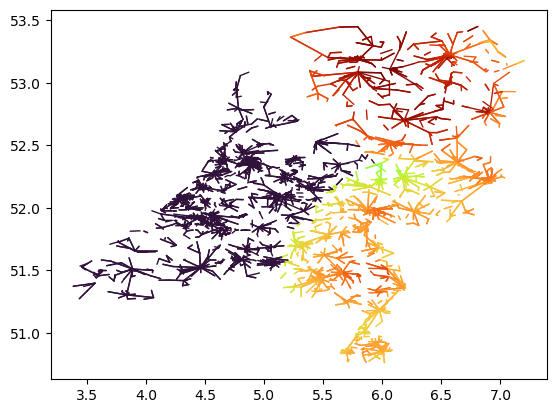

In [104]:
foo.plg.plot_cmls()

In [107]:
2**16 * 0.01

655.36

<xarray.Dataset> Size: 21GB
Dimensions:          (cml_id: 5891, time: 437983)
Coordinates:
  * cml_id           (cml_id) int64 47kB 5461 4636 5295 1836 ... 1256 88 3845
  * time             (time) datetime64[ns] 4MB 2011-01-13 ... 2015-03-13T19:5...
    site_0_lat       (cml_id) float64 47kB 52.74 52.23 53.13 ... 52.98 52.27
    length           (cml_id) float64 47kB 6.769 4.955 4.294 ... 2.166 7.755
    site_0_lon       (cml_id) float64 47kB 5.234 6.627 6.586 ... 5.892 4.57
    site_1_lat       (cml_id) float64 47kB 52.7 52.25 53.17 ... 52.97 52.33
    site_1_lon       (cml_id) float64 47kB 5.163 6.692 6.596 ... 5.918 4.632
    cml_id_str       (cml_id) <U4 94kB '5461' '4636' '5295' ... '0088' '3845'
    frequency        (cml_id) float64 47kB 25.41 37.99 39.24 ... 37.91 27.0
Data variables:
    radar_along_cml  (time, cml_id) float64 21GB nan 0.06779 0.0 ... 0.0 0.0 nan

In [112]:
%%time

ds_rad_along_cmls.to_dataset(name='radar_along_cml').to_netcdf(
    'nl_radklim_along_cmls.nc', 
    encoding={
        'radar_along_cml': {
            'zlib': True, 
            'scale_factor': 0.01,
            'dtype': 'int32',
            '_FillValue': -9999,
        },
    },
)

CPU times: user 2min 12s, sys: 8.34 s, total: 2min 20s
Wall time: 2min 21s


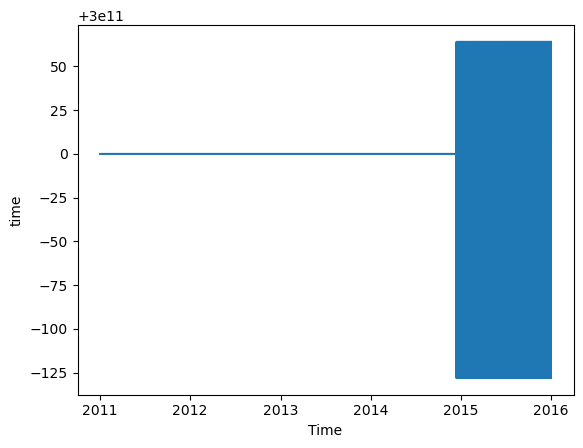

In [84]:
ds_radklim.time.diff(dim='time').plot()

In [37]:
get_grid_at_lines(da_gridded_data=ds_radklim.isel(time=slice(0, 100)).rainfall_amount)

TypeError: Unsupported types.